# Exploring map projections

Here we'll look at a few map projections and help you to choose between them.

This notebook accompanies the [DataTree course](https://datatree.org.uk), [module 5, Visualization](https://datatree.org.uk/course/view.php?id=5).

Lots of visualisations are based around maps representing quantities, such as temperature, varying on the Earth's surface (or other surfaces parallel to it). The Earth is (roughly) an ellipsoid and so we must find a way of "flattening" it in order to represent it on a screen or a piece of paper. The mathematical formula for this flattening is a map projection.

We'll start with perhaps the most commonly-used projection...

## Latitude-longitude projection

We can simply plot latitude against longitude. This gives the "Plate Carrée", "Equidistant Cylindrical" or "Equirectangular" projection.

In [1]:
# We'll start by importing some mapping libraries. Here we are using Cartopy,
# although other mapping libraries (such as Basemap) exist:

import matplotlib.pyplot as plt  # Matplotlib plotting library
import cartopy.crs as ccrs       # "crs" is "coordinate reference system"

import warnings
warnings.filterwarnings(action='ignore') # Cartopy emits warnings that aren't useful here

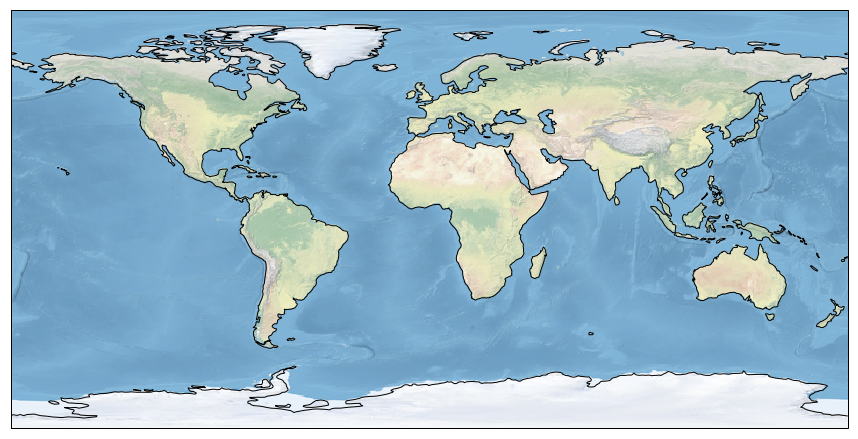

In [2]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global() # Show the whole globe

ax.stock_img()  # Adds a nice background image
ax.coastlines() # Draws coastlines
plt.show()

We can look at the distortion introduced by this projection by plotting "**Tissot's indicatrices**". These show how circles of equal size appear when projected.

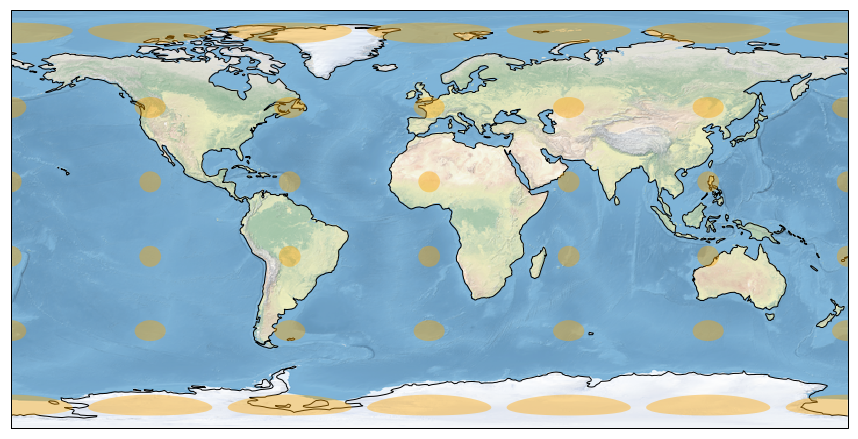

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='orange', alpha=0.4)

plt.show()

We can see that we are distorting both the **size** and **shape** of things as we move closer to the poles. How can we do better?

## Projection types

Different projections can preserve different attributes of the map:

 * **Equal-area**: preserves the relative areas of shapes
 * **Conformal**: preserves shapes (at least locally)
 * **Equidistant**: preserves relative distances from a point or line
 * ...more!
 
Here we will be concerned mostly with **equal-area** and **conformal** projections as they are generally the most useful in science.

## Equal-area projections: global scale

These projections are often used for global-scale data:

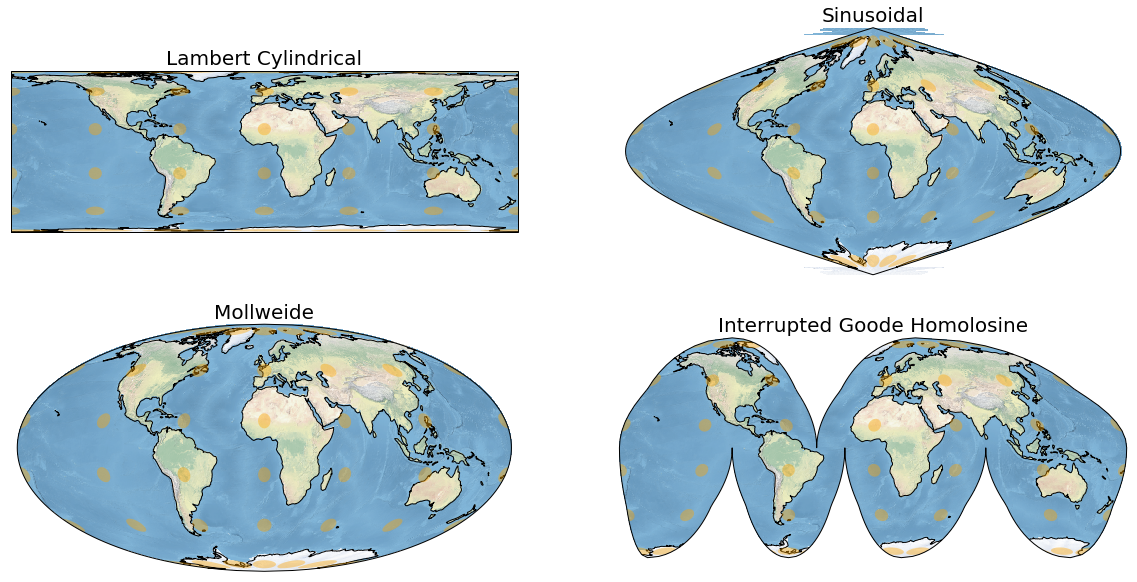

In [4]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.LambertCylindrical())
ax1.set_title("Lambert Cylindrical", fontsize=20)
ax1.set_global()
ax1.stock_img()
ax1.coastlines()
ax1.tissot(facecolor='orange', alpha=0.4)

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.Sinusoidal())
ax2.set_title("Sinusoidal", fontsize=20)
ax2.set_global()
ax2.stock_img()
ax2.coastlines()
ax2.tissot(facecolor='orange', alpha=0.4)

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.Mollweide())
ax3.set_title("Mollweide", fontsize=20)
ax3.set_global()
ax3.stock_img()
ax3.coastlines()
ax3.tissot(facecolor='orange', alpha=0.4)

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.InterruptedGoodeHomolosine())
ax4.set_title("Interrupted Goode Homolosine", fontsize=20)
ax4.set_global()
ax4.stock_img()
ax4.coastlines()
ax4.tissot(facecolor='orange', alpha=0.4)

plt.show()

## Equal-area projections: regional scale

We can also preserve relative areas on a regional scale whilst reducing the distortion of shape across the area of interest:

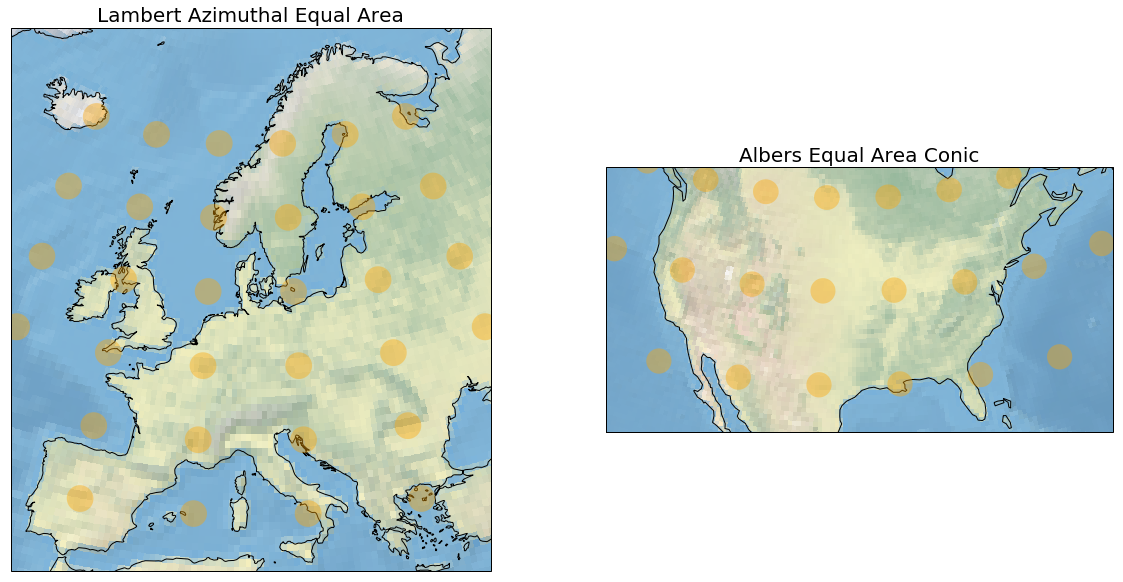

In [5]:
fig = plt.figure(figsize=(20, 10))

# A standard projection for the European Union
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.LambertAzimuthalEqualArea(central_longitude=10.0,
                                                                         central_latitude=52.0,
                                                                         false_easting=4321000,
                                                                         false_northing=3210000))
ax1.set_title("Lambert Azimuthal Equal Area", fontsize=20)
# Use rough lat-lon extent of Europe
ax1.set_extent((-10, 30, 36, 72), ccrs.PlateCarree())
ax1.stock_img()
ax1.coastlines(resolution="50m")
ax1.tissot(facecolor='orange', rad_km=100, lons=range(-15, 40, 10), lats=range(40, 70, 5), alpha=0.4)

# A standard projection used for the contiguous 48 states of the USA
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.AlbersEqualArea(central_longitude=-96.0,
                                                               central_latitude=23.0,
                                                               standard_parallels=(29.5, 45.5)))
ax2.set_title("Albers Equal Area Conic", fontsize=20)
# Use rough lat-lon extent of the contiguous USA
ax2.set_extent((-125, -65, 25, 50), ccrs.PlateCarree())
ax2.stock_img()
ax2.coastlines()
ax2.tissot(facecolor='orange', rad_km=150, lons=range(-130, -50, 10), lats=range(20, 60, 10), alpha=0.4)

plt.show()

There are a very large number of such projections, for different regions.

## Mercator projection

Preserves shape on a local scale (it is **conformal**). Commonly used in web-based mapping tools.

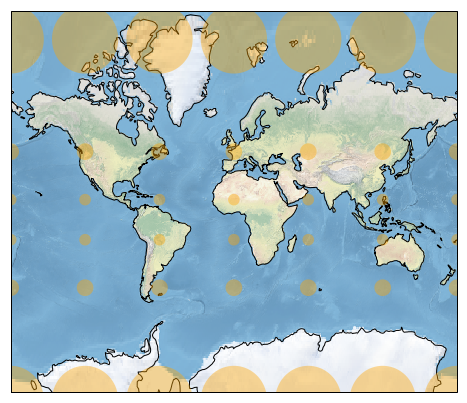

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.tissot(facecolor='orange', alpha=0.4)
plt.show()

(See https://thetruesize.com/)

## "Compromise" projections

Some projections, like the **Robinson** projection below, are neither conformal nor equal-area but are constructed as a compromise between the two, for aesthetic reasons:

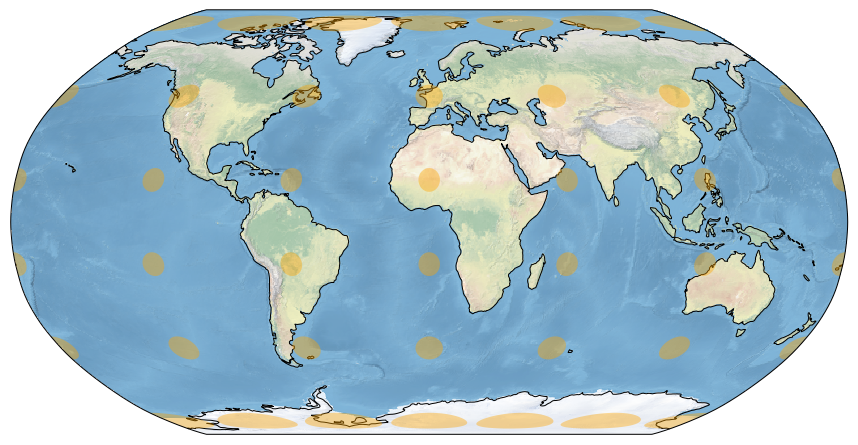

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.tissot(facecolor='orange', alpha=0.4)
plt.show()

## Country-scale projections

Countries usually have a "standard" map projection. This is the projection used for mapping in Great Britain (it is a type of "Transverse Mercator" projection). It is conformal, but not equal-area: however area distortions are small at this scale.

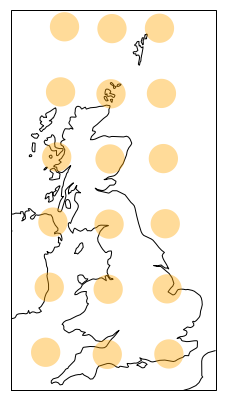

In [8]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.OSGB())
ax.set_global()
ax.coastlines(resolution="50m")
ax.tissot(facecolor='orange', rad_km=50, lons=range(-6, 2, 3), lats=range(51, 62, 2), alpha=0.4)
plt.show()

## Some other projections

**Orthographic** projections show what the Earth looks like from a far distant viewpoint. 

**Polar stereographic** projections are examples of projections designed to focus on the poles.

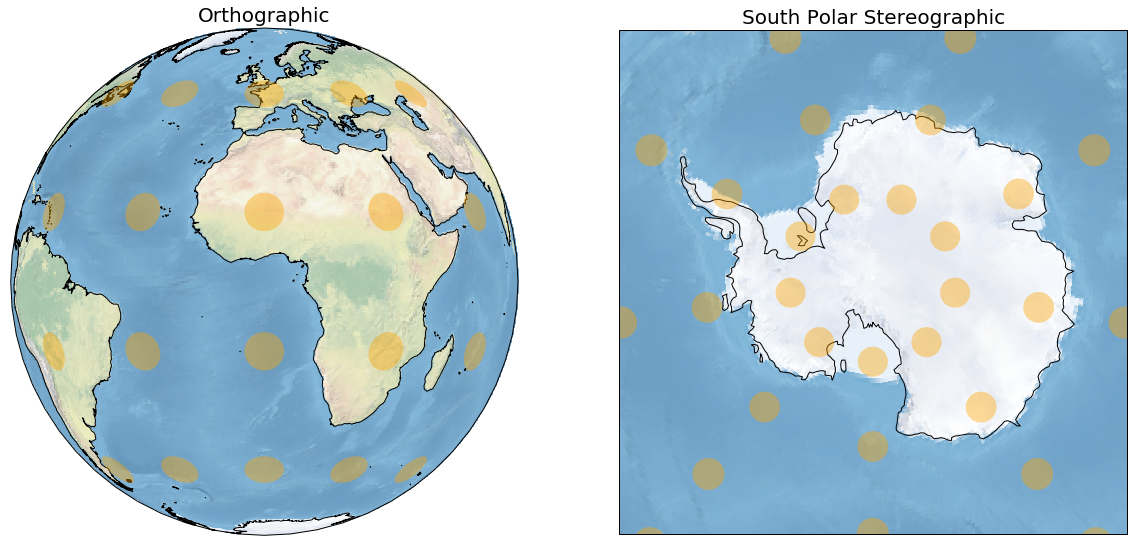

In [9]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic())
ax1.set_title("Orthographic", fontsize=20)
ax1.set_global()
ax1.stock_img()
ax1.coastlines(resolution="50m")
ax1.tissot(facecolor='orange', lons=range(-90, 90, 30), alpha=0.4)

ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo())
ax2.set_title("South Polar Stereographic", fontsize=20)
ax2.set_extent((-180, 180, -90, -60), ccrs.PlateCarree())
ax2.stock_img()
ax2.coastlines()
ax2.tissot(facecolor='orange', rad_km=200, lons=range(-180, 180, 40), lats=range(-80, -40, 10), alpha=0.4)

plt.show()

## Example of plotting data using a map projection

Simple example of plotting data, automatically fit to the projection by the Cartopy library.

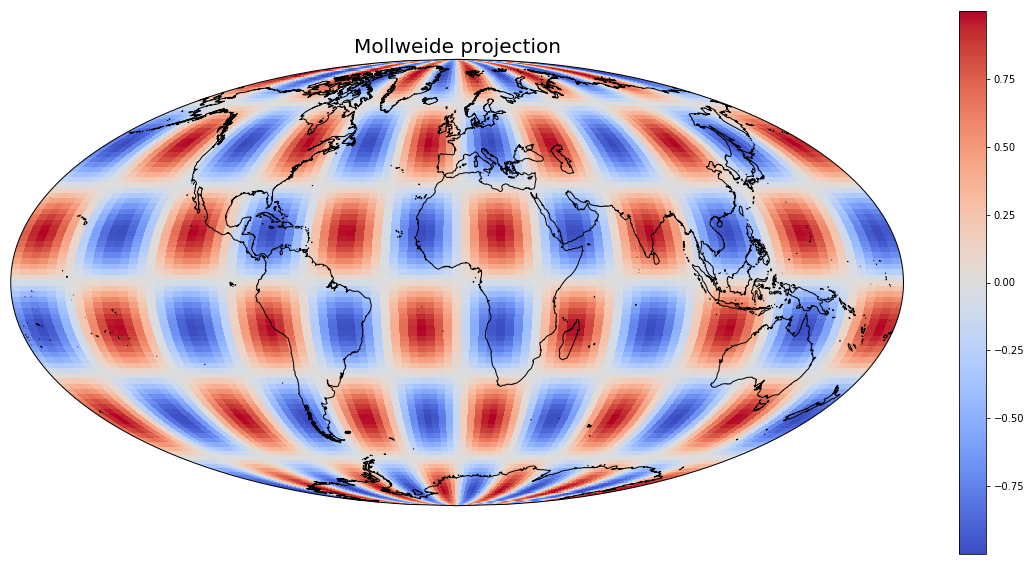

In [10]:
import numpy as np
import math

# Create the longitude and latitude axes
lonaxis = np.linspace(-180, 180, 100)
lataxis = np.linspace(-90, 90, 100)
lons, lats = np.meshgrid(lonaxis, lataxis)

# A simple "eggbox" function
def func(lon, lat):
    return np.sin(lon/10) * np.sin(lat/10)

# This creates the data we will visualise
z = func(lons, lats)

# Now we can plot z as a function of longitude and latitude in any projection
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Mollweide()) # This is the projection of the map 
ax.set_title("Mollweide projection", fontsize=20)
cf = plt.pcolormesh(lons, lats, z, cmap=plt.get_cmap('coolwarm'), transform=ccrs.PlateCarree()) # This is the projection of the data
ax.coastlines(resolution="50m")
fig.colorbar(cf, ax=ax)

plt.show()

## Review

To summarise the main points:

 * Generally, we can choose between preserving relative **areas**, and preserving **shapes**: we can't do both
 * Regions and countries may have standard projections: use them if you can
 * The latitude-longitude projection does not have many useful properties: consider avoiding it
 * Even if your data are in lats and lons, it's easy to convert them to another projection